Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ ÎßåÎì§Í∏∞ ÎåÄÏã† Ìä∏ÎüºÌîÑ ÎßàÏä§ÌÅ¨ ÏîåÏö∞Í∏∞Î°ú ÏûêÏ≤¥Î≥ÄÍ≤ΩÌïòÏó¨ ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâÌï¥Î≥¥ÏïòÏäµÎãàÎã§.

In [266]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [298]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t1.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

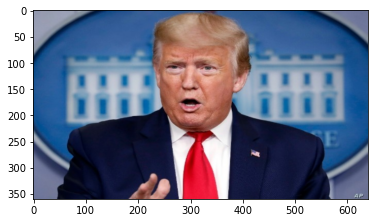

In [299]:
# ÌôïÏù∏
plt.imshow(img_rgb)
plt.show()

In [300]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏

In [301]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)
print(dlib_rects)

rectangles[[(239, 82) (368, 211)]]


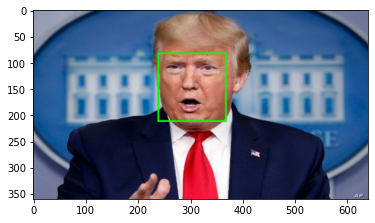

In [302]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [303]:
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞.

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

print("üå´üõ∏")

üå´üõ∏


In [304]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


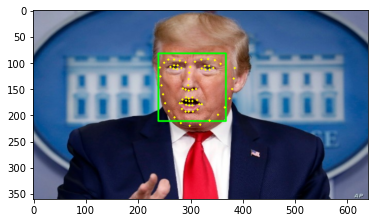

In [305]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [306]:
# Ï¢åÌëúÌôïÏù∏

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (243,108)
(w,h) : (160,132)


In [307]:
# Ïä§Ìã∞Ïª§Î•º ÏùΩÍ≥† Ïúó Îã®Í≥ÑÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÌÅ¨Í∏∞Î°ú resize

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(132, 160, 3)


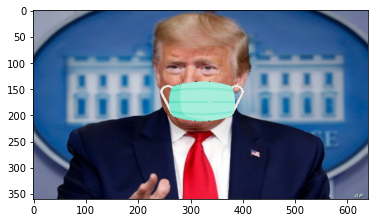

In [308]:
# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•

sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Îã§Î•∏ ÏÇ¨ÏßÑ1

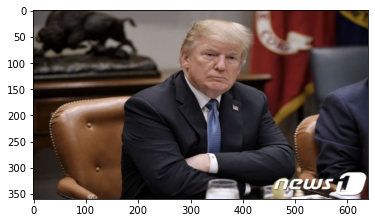

In [309]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t2.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

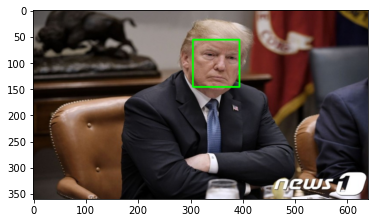

In [310]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

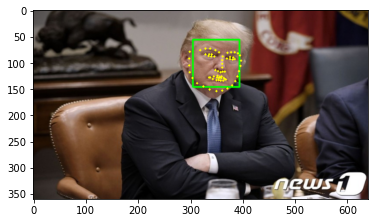

In [311]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

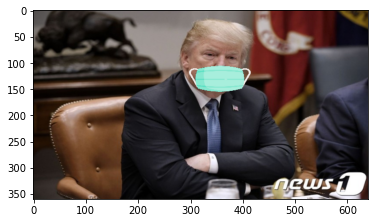

In [312]:
# Ï¢åÌëúÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# Ïä§Ìã∞Ïª§Î•º ÏùΩÍ≥† Ïúó Îã®Í≥ÑÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÌÅ¨Í∏∞Î°ú resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Îã§Î•∏ÏÇ¨ÏßÑ 2

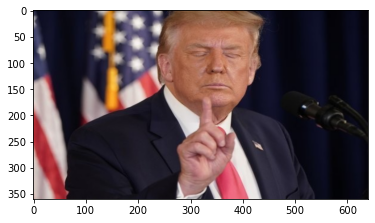

In [313]:
# ÎààÍ∞êÏùÄ ÏÇ¨ÏßÑ
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t3.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

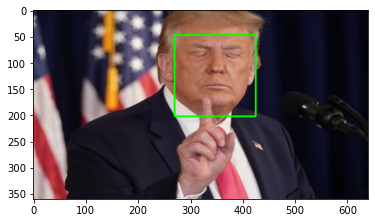

In [314]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

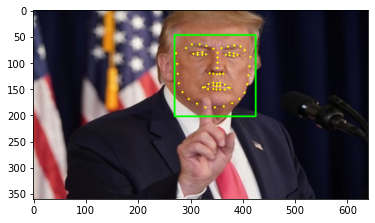

In [315]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

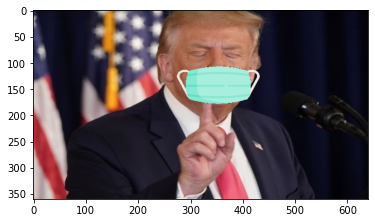

In [316]:
# Ï¢åÌëúÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# Ïä§Ìã∞Ïª§Î•º ÏùΩÍ≥† Ïúó Îã®Í≥ÑÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÌÅ¨Í∏∞Î°ú resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

ÎààÏùÑ Í∞êÏïÑÎèÑ ÏñºÍµ¥Î°ú Ïù∏Ïãù.

### Îã§Î•∏ ÏÇ¨ÏßÑ 3

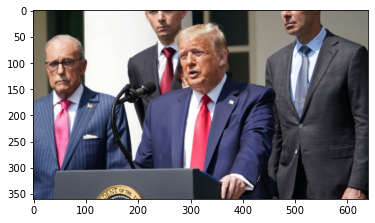

In [317]:
# Ïó¨Îü¨ÏÇ¨ÎûåÏù¥ Ìïú ÌîÑÎ†àÏûÑÏóê ÏûàÏùÑ Îïå
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t4.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

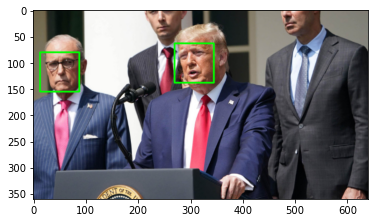

In [318]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

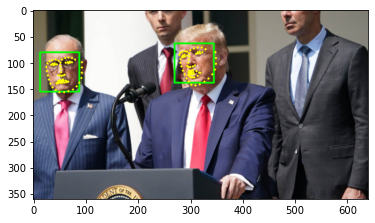

In [320]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):                # landmarkÎ°ú Î≥ÄÍ≤Ω
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

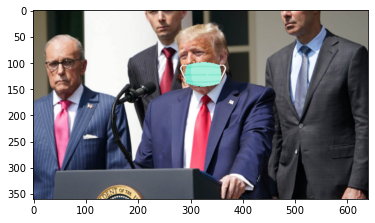

In [321]:
# Ï¢åÌëúÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# Ïä§Ìã∞Ïª§Î•º ÏùΩÍ≥† Ïúó Îã®Í≥ÑÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÌÅ¨Í∏∞Î°ú resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- Ìïú ÏÇ¨ÎûåÏóêÍ≤åÎßå Ïä§Ìã∞Ïª§Í∞Ä ÏîåÏñ¥ÏßÑÎã§.    
- ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïú Îã§Î•∏ ÏÇ¨Îûå ÎßàÏä§ÌÅ¨Îäî Ïñ¥ÎñªÍ≤å ÏîåÏö∞ÏßÄ..?
- Îí§Ïóê Îëê Î™ÖÏùÄ ÏñºÍµ¥Ïù¥ ÏûòÎ†§ÏÑú Í∑∏Îü∞ÏßÄ Ïù∏Ïãù Î™ªÌï®.

### Îã§Î•∏ÏÇ¨ÏßÑ 4

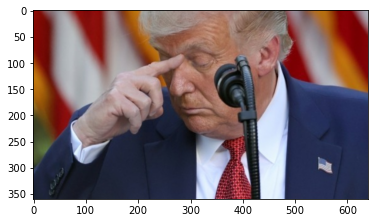

In [322]:
# ÏñºÍµ¥Ïù¥ ÏùºÎ∂Ä Í∞ÄÎ†§ÏßÑ ÏÇ¨ÏßÑ
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t11.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

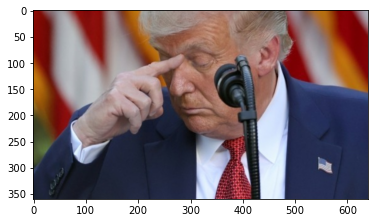

In [323]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

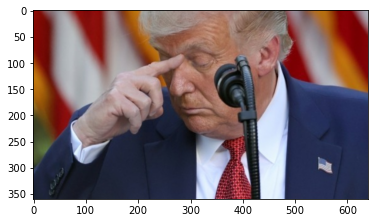

In [325]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- Ìïú Ï™Ω ÎààÏù¥ Í∞ÄÎ†§ÏßÑ ÏÇ¨ÏßÑÏùÄ ÏñºÍµ¥Î°ú Ïù∏ÏãùÏùÑ Î™ªÌïòÎäî ÎìØ.

### Îã§Î•∏ÏÇ¨ÏßÑ 5

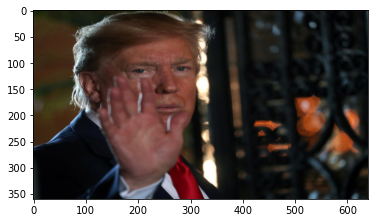

In [327]:
# ÏñºÍµ¥ ÏùºÎ∂ÄÍ∞Ä Í∞ÄÎ†§Ï°åÏßÄÎßå Îëê ÎààÏùÄ Î≥¥Ïù¥Îäî ÏÇ¨ÏßÑ
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t17.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

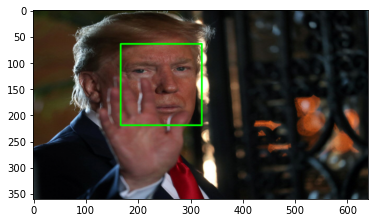

In [328]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

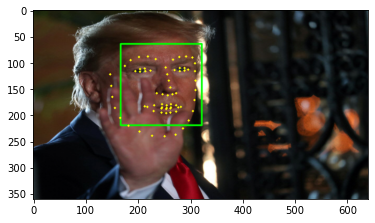

In [329]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

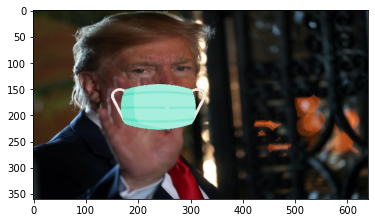

In [330]:
# Ï¢åÌëúÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# Ïä§Ìã∞Ïª§Î•º ÏùΩÍ≥† Ïúó Îã®Í≥ÑÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÌÅ¨Í∏∞Î°ú resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- Îëê ÎààÏù¥ Î≥¥Ïó¨Ïïº ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïòÎäî ÎìØÌïòÎã§.

### Îã§Î•∏ ÏÇ¨ÏßÑ 6

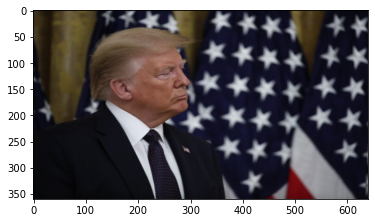

In [331]:
# Îëê ÎààÏù¥ Î≥¥Ïó¨Ïïº ÌïúÎã§Î©¥ ÏòÜÎ™®ÏäµÎèÑ ÏñºÍµ¥Î°ú Ïù∏ÏãùÎ™ªÌïòÎäî Í±¥Í∞Ä
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t19.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

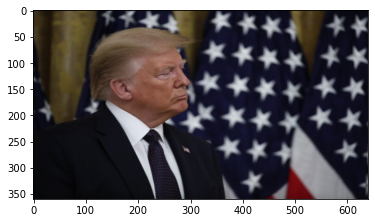

In [332]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

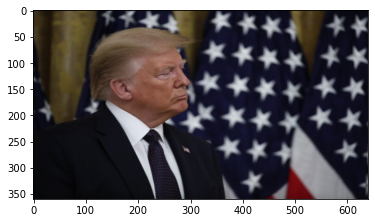

In [333]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- ÏòÜÎ™®ÏäµÏóêÎèÑ ÏñºÍµ¥Î°ú Ïù∏ÏãùÏùÑ Î™ªÌïòÎäî Í±∏Î°ú Î≥¥ÏïÑ, Îëê ÎààÏù¥ Ï∞çÌûå Ï†ïÎ©¥Ïù¥ ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïòÎäî Í≤É Í∞ôÎã§.